# Project Name - Exploratory data analysis on Google Play Store

### Import Libraries

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [2]:
#importing google play store csv file
google_play_data=pd.read_csv('googleplaystore.csv')

###  Dataset sample view

In [3]:
google_play_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Information about the dataset

#### - App: Name of the application.
#### - Category: Category the app belongs to.
#### - Rating: Overall user rating of the app.
#### - Reviews: Number of user reviews for the app.
#### - Size: Size of the app.
#### - Installs: Number of user downloads/installs for the app.
#### - Type: Paid or Free.
#### - Price: Price of the app (if it is paid).
#### - Content Rating: Age group the app is targeted at.
#### - Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will    belong to Music, Game, Family genres.
#### - Last Updated: Date when the app was last updated on Play Store.
#### - Current Ver: Current version of the app available on Play Store.
#### - Android Ver: Minimum required Android version.

In [4]:
# checking the data types of all columns
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Missing values in the dataset

In [5]:
google_play_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Changing the datatypes of the columns

### a) Removing the invalid value from the reviews and converting the datatype of reviews to int

In [6]:
google_play_data[~google_play_data.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
# removing invalid Review
google_play_data=google_play_data.drop([10472])

In [8]:
#changing the datatype of Reviews to int
google_play_data["Reviews"]=google_play_data["Reviews"].astype("int")

### b) Sizes of applications are converted from string to float format and transformed all the values to thousands

In [9]:
#converting all the values to thousands i.e in k
google_play_data["Size"]=google_play_data["Size"].str.replace('M','000')
google_play_data["Size"]=google_play_data["Size"].str.replace('k',' ')

In [10]:
google_play_data['Size']

0                     19000
1                     14000
2                    8.7000
3                     25000
4                    2.8000
                ...        
10836                 53000
10837                3.6000
10838                9.5000
10839    Varies with device
10840                 19000
Name: Size, Length: 10840, dtype: object

In [11]:
# checking the values of size which is not an integer
google_play_data[google_play_data['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [12]:
#changing the datatype of Size to float
google_play_data['Size'] = google_play_data['Size'].apply(lambda x: float(x) if x != 'Varies with device' else x)

In [13]:
google_play_data['Size']

0                   19000.0
1                   14000.0
2                       8.7
3                   25000.0
4                       2.8
                ...        
10836               53000.0
10837                   3.6
10838                   9.5
10839    Varies with device
10840               19000.0
Name: Size, Length: 10840, dtype: object

In [14]:
google_play_data['Size'].isnull().sum()

0

### c) Removing the unneccesary symbols from Installs and Price columns and changing their datatypes to int and float respectively

In [15]:
# removing the unnecessary symbols from Installs and Price columns
char_to_remove=["+",",","$"]
col_to_clean=["Installs","Price"]
for items in char_to_remove:
    for col in col_to_clean:
        google_play_data[col]=google_play_data[col].str.replace(items,"",regex=True)

In [16]:
#changing the datatype of Installs to int
google_play_data["Installs"]=google_play_data["Installs"].astype("int")

In [17]:
#changing the datatype of Price to int
google_play_data["Price"]=google_play_data["Price"].astype("float")

### d) Changing the datatype of Last Updated column to datetime

In [18]:
google_play_data["Last Updated"]=pd.to_datetime(google_play_data["Last Updated"])

In [19]:
# updated datatypes of all columns
google_play_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.1+ MB


### Handling Null values

In [20]:
google_play_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### a) Rating- replacing the 1474 null values with median of rating

In [21]:
google_play_data[google_play_data['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7,100000,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7,50000,Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4,100000,Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9,10000,Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82000.0,10000,Free,0.0,Everyone,Medical,2018-07-31,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7,100,Free,0.0,Teen,Social,2018-02-02,1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,5000,Free,0.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up


In [22]:
google_play_data['Rating'].fillna(value=google_play_data['Rating'].median(),inplace=True) 
google_play_data['Reviews'].isnull().sum()

0

### b) Sanity Check

In [23]:
# number of rating cannot be greater than the number of installations hence droppping these columns
invalid_rows=google_play_data.loc[google_play_data['Rating'] > google_play_data['Installs']]

In [24]:
google_play_data = google_play_data.drop(invalid_rows.index)

In [25]:
google_play_data.loc[google_play_data['Rating'] > google_play_data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [26]:
google_play_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### c) Dropping null values from Current and android version

In [27]:
#dropping nan from Current Ver 
google_play_data[google_play_data['Current Ver'].isnull()==True]
google_play_data=google_play_data.dropna(subset='Current Ver')

In [28]:
#dropping nan from Android Ver 
google_play_data=google_play_data.dropna(subset='Android Ver')

In [29]:
#dropping nan from Android Ver 
google_play_data=google_play_data.dropna(subset='Type')

In [30]:
google_play_data['Size']

0                   19000.0
1                   14000.0
2                       8.7
3                   25000.0
4                       2.8
                ...        
10836               53000.0
10837                   3.6
10838                   9.5
10839    Varies with device
10840               19000.0
Name: Size, Length: 10748, dtype: object

In [31]:
google_play_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### d) Dropping the duplicates from apps

In [32]:
# dropping the duplicate values from app
google_play_data.drop_duplicates(subset='App',inplace=True)

In [33]:
google_play_data['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook        1
ck-modelcars Shop                                     1
ck-modelcars-UK Shop                                  1
CK Multimedia - Gaming Accessories                    1
CK SKILLZ                                             1
                                                     ..
Learn C# - .Net - C Sharp Programming Tutorial App    1
Learn Basic C - For Beginners                         1
C Prowess                                             1
101 C Programming Problems                            1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9567, dtype: int64

## Data Visualisation

## Categories in the google play store

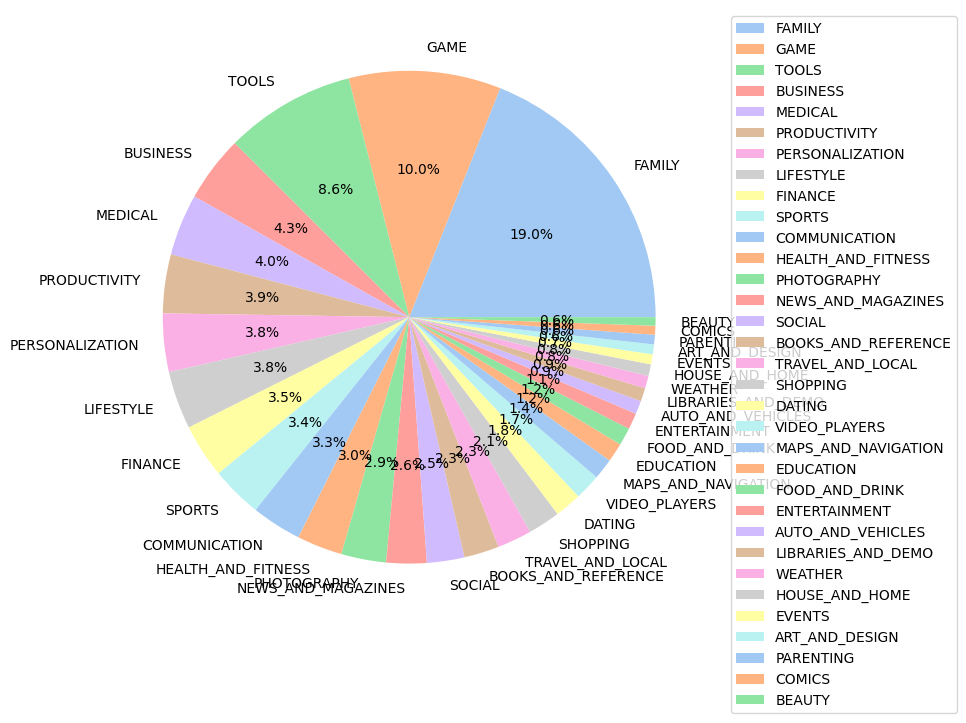

In [34]:
category = google_play_data['Category'].value_counts().reset_index()
num_colors = len(category)
palette = sns.color_palette("pastel", n_colors=num_colors)
plt.figure(figsize=(8,8))
ax = plt.subplot(111)
plt.pie(x = category['Category'], labels= category['index'],autopct= '%1.1f%%',colors=palette)
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show() 

In [35]:
# calculating the top categories
top_counts =google_play_data['Category'].value_counts()
top_counts

FAMILY                 1816
GAME                    954
TOOLS                   820
BUSINESS                414
MEDICAL                 387
PRODUCTIVITY            369
PERSONALIZATION         366
LIFESTYLE               364
FINANCE                 339
SPORTS                  322
COMMUNICATION           314
HEALTH_AND_FITNESS      286
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      253
SOCIAL                  235
BOOKS_AND_REFERENCE     220
TRAVEL_AND_LOCAL        217
SHOPPING                202
DATING                  169
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          111
ENTERTAINMENT           102
AUTO_AND_VEHICLES        84
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   63
ART_AND_DESIGN           62
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [36]:
## Top 5 categories by counts
top5_categories=google_play_data['Category'].value_counts(ascending=False).head().reset_index()
top5_categories   

,index,Category
0,FAMILY,1816
1,GAME,954
2,TOOLS,820
3,BUSINESS,414
4,MEDICAL,387


### Insights
#### * The "Family" category has the largest number of apps, which suggests that this category is popular among users on the platform.

#### * The "Game" category is the second largest, which indicates that games are also a popular category on the platform.

#### * The "Tools" category has a significant number of apps, which suggests that users on the platform are interested in apps that provide practical and useful tools.

## Top 10 installed Apps under each category

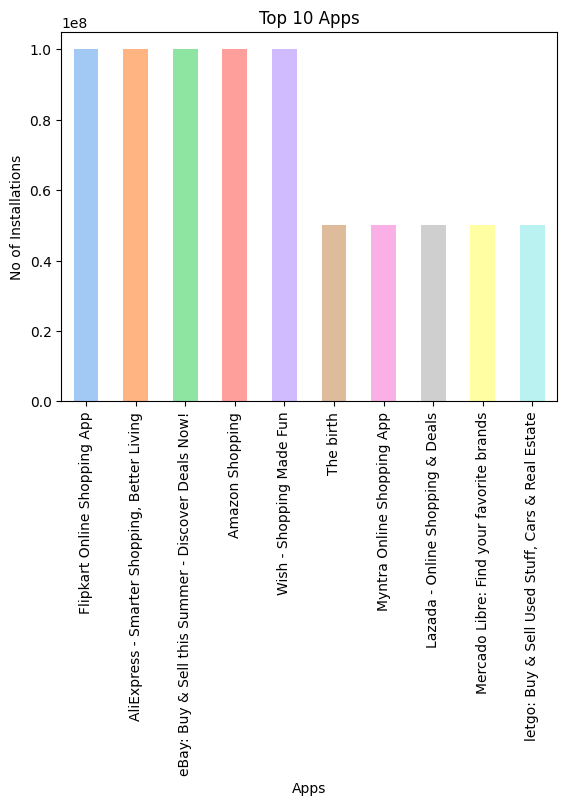

In [37]:
def plot_top_10_installed_apps(category):
    def top_10_installed_apps(category):
        return google_play_data.groupby(['Category','App'])['Installs'].sum().loc[category].sort_values(ascending=False)[:10]

    colors = sns.color_palette('pastel')
    top_10_apps = top_10_installed_apps(category)
    top_10_apps.plot(kind='bar', xlabel='Apps', ylabel='No of Installations', title='Top 10 Apps', color=colors)
plot_top_10_installed_apps('SHOPPING')

In [38]:
google_play_data.groupby(['Category','App'])['Installs'].sum().loc['SHOPPING'].sort_values(ascending=False)[:10]

App
Flipkart Online Shopping App                          100000000
AliExpress - Smarter Shopping, Better Living          100000000
eBay: Buy & Sell this Summer - Discover Deals Now!    100000000
Amazon Shopping                                       100000000
Wish - Shopping Made Fun                              100000000
The birth                                              50000000
Myntra Online Shopping App                             50000000
Lazada - Online Shopping & Deals                       50000000
Mercado Libre: Find your favorite brands               50000000
letgo: Buy & Sell Used Stuff, Cars & Real Estate       50000000
Name: Installs, dtype: int32

### Insights
#### * The top 5 installed apps in this category all have a massive 100,000,000 installations, indicating that they are extremely popular among users.
#### * The presence of global online shopping giants like Flipkart, Amazon, eBay, AliExpress, and Wish at the top of the list suggests that these apps are dominating the online shopping market and have established a strong user base.

### Top 10 apps under Tools

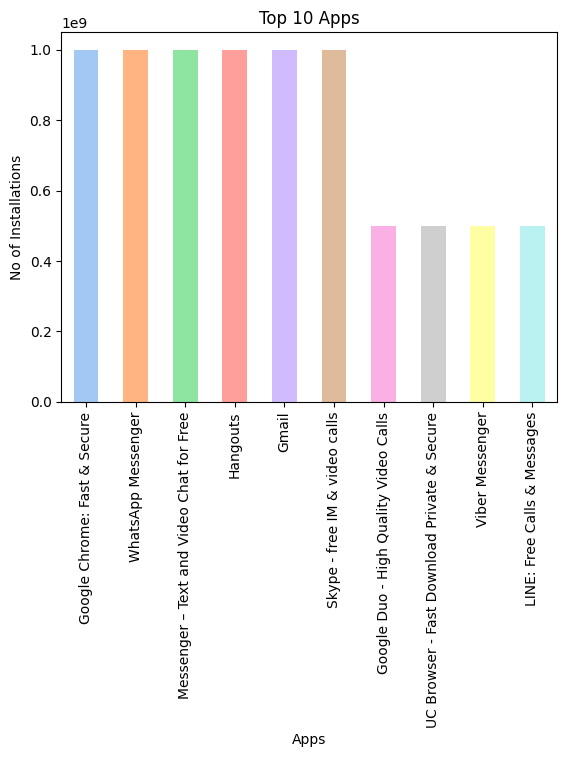

In [39]:
plot_top_10_installed_apps('COMMUNICATION')

In [40]:
google_play_data.groupby(['Category','App'])['Installs'].sum().loc['COMMUNICATION'].sort_values(ascending=False)[:10]

App
Google Chrome: Fast & Secure                   1000000000
WhatsApp Messenger                             1000000000
Messenger – Text and Video Chat for Free       1000000000
Hangouts                                       1000000000
Gmail                                          1000000000
Skype - free IM & video calls                  1000000000
Google Duo - High Quality Video Calls           500000000
UC Browser - Fast Download Private & Secure     500000000
Viber Messenger                                 500000000
LINE: Free Calls & Messages                     500000000
Name: Installs, dtype: int32

### Insights
#### * The top six installed apps in this category all have an astounding 1 billion or more installations, indicating that they are extremely popular among users.

#### * Google has three apps in the top six: Google Chrome, Hangouts, and Gmail. This suggests that Google has a strong presence in the communication market, with users using multiple Google apps for different communication needs.

#### * WhatsApp Messenger, Messenger, and Skype are the top three messaging apps in terms of installations. This suggests that messaging is still the most popular form of communication among users.

## Free Vs Paid Apps percentage

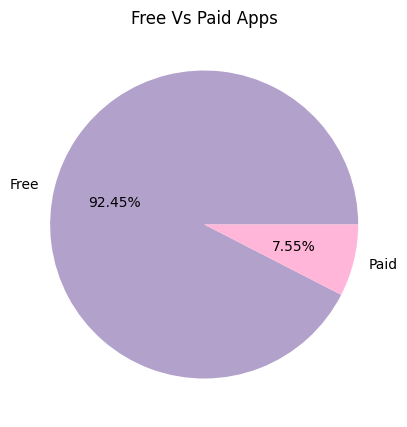

In [41]:
paid_or_free=google_play_data['Type'].value_counts()
labels=google_play_data['Type'].value_counts().index
plt.figure(figsize=(8,5))
colors= ['#B1A1CB', '#FFB6D9']
explode=(0.01,0.1)
plt.pie(paid_or_free,labels=labels,colors=colors,autopct='%.2f%%',textprops={'fontsize': 10})
plt.title('Free Vs Paid Apps')
plt.show()

In [42]:
google_play_data['Type'].value_counts()

Free    8845
Paid     722
Name: Type, dtype: int64

### Insights
#### * The majority of apps on the platform are free, which suggests that users are more likely to download free apps than paid apps.

#### * There are a relatively small number of paid apps on the platform, which suggests that developers may have a more difficult time generating revenue from paid apps compared to other monetization models, such as in-app purchases or advertising.

#### * The presence of both free and paid apps on the platform suggests that there is a market for both types of apps, and that users may be willing to pay for apps that provide value or unique features.

## Count of content rating for each group

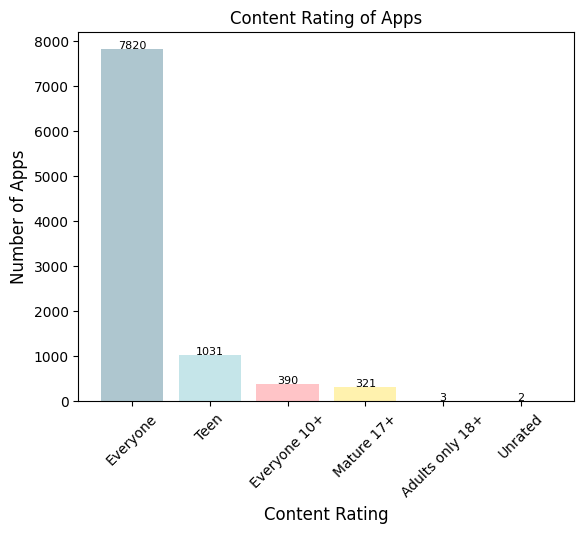

In [43]:
import matplotlib.pyplot as plt

data = google_play_data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']
colors=['#AEC6CF', '#C5E5E9', '#FFC4C7', '#FFF2AE', '#D1D1E0', '#FDDAEC', '#C7E9C0', '#FEC8D8', '#E6F5C9', '#FFE5CC']
plt.bar(labels, data,color=colors)
plt.title('Content Rating of Apps',fontsize=12)
plt.xlabel('Content Rating',fontsize=12)
plt.xticks(range(len(data)), labels, rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Apps',fontsize=12)
for i, count in enumerate(data):
    plt.text(i, count+10, str(count), ha='center', fontsize=8)

plt.show()

In [44]:
google_play_data.groupby(['Content Rating'])['App'].count()

Content Rating
Adults only 18+       3
Everyone           7820
Everyone 10+        321
Mature 17+          390
Teen               1031
Unrated               2
Name: App, dtype: int64

### Insights
#### * The majority of apps are rated "Everyone", which suggests that most apps on the platform are suitable for all ages.

#### * There are a significant number of apps rated for "Teen" and "Mature 17+" audiences, which suggests that there are a significant number of apps that are not suitable for younger audiences.

#### * There are very few apps rated "Adults only 18+", which suggests that the platform has a relatively low tolerance for apps that are explicitly sexual or violent.

#### * The number of apps rated "Everyone 10+" is relatively low, which suggests that there is not a significant amount of content that is specifically targeted towards this age group.

#### * The presence of "Unrated" apps suggests that there may be some apps on the platform that have not been rated or evaluated for content. This could be due to various reasons, such as the app being new or not yet reviewed by the platform.

### No of Installations for each group

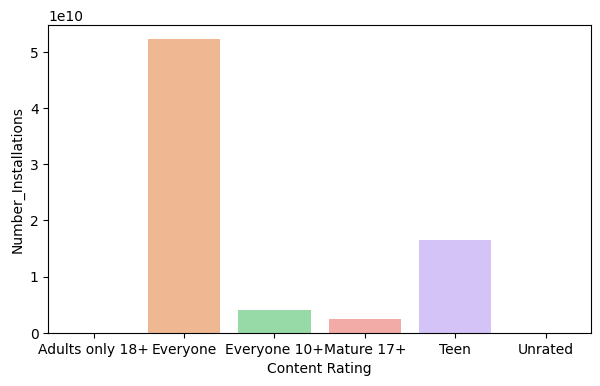

In [45]:
pastel_palette = sns.color_palette("pastel")
data =  google_play_data.groupby('Content Rating')['Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(7,4))
sns.set_palette(pastel_palette)
sns.barplot(x=data['Content Rating'], y=data['Number_Installations'])
plt.show()

In [46]:
google_play_data.groupby(['Content Rating'])['Installs'].agg('sum')

Content Rating
Adults only 18+        2000000
Everyone           52177775790
Everyone 10+        4016271795
Mature 17+          2437986875
Teen               16487275390
Unrated                  50500
Name: Installs, dtype: int64

### Insights
#### *  This data suggests that the majority of app users prefer apps with a content rating of "Everyone" or "Teen". Additionally, the number of app installs decreases as the content rating becomes more restrictive, with the "Adults only 18+" category having the fewest installs.

## Rating Distribution

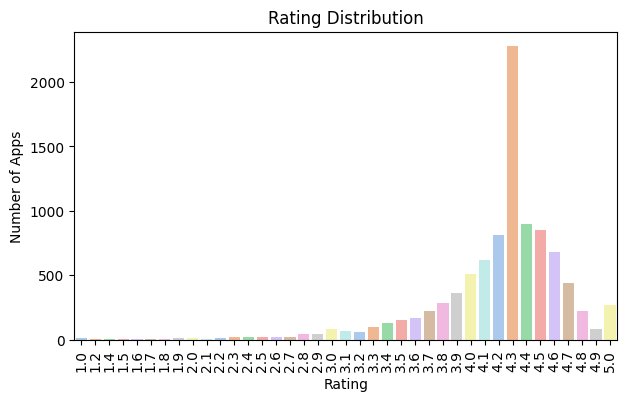

In [47]:
plt.figure(figsize=(7,4))
sns.countplot(x='Rating',data=google_play_data,palette='pastel')
plt.title('Rating Distribution')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.show()

In [48]:
google_play_data.groupby(['Rating'])['App'].count()

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      11
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      81
3.1      69
3.2      62
3.3     100
3.4     126
3.5     156
3.6     167
3.7     224
3.8     286
3.9     359
4.0     512
4.1     620
4.2     809
4.3    2277
4.4     894
4.5     847
4.6     683
4.7     442
4.8     221
4.9      85
5.0     268
Name: App, dtype: int64

### Insights
#### * The majority of ratings fall within the range of 3.0 to 4.5, with the highest number of ratings being in the 4.3 range. This might indicate that most users are satisfied with the apps they are downloading.

#### * There are very few ratings below 2.0, which might indicate that either the platform has a minimum quality threshold for apps, or that users are unlikely to rate apps that they find extremely unsatisfactory.

#### * The distribution of ratings could potentially be used as a benchmark for app developers to aim for when creating new apps. For example, developers might aim to get a rating of 4.3 or higher in order to achieve a competitive rating for their app.

## Top 10 Categories with highest installation

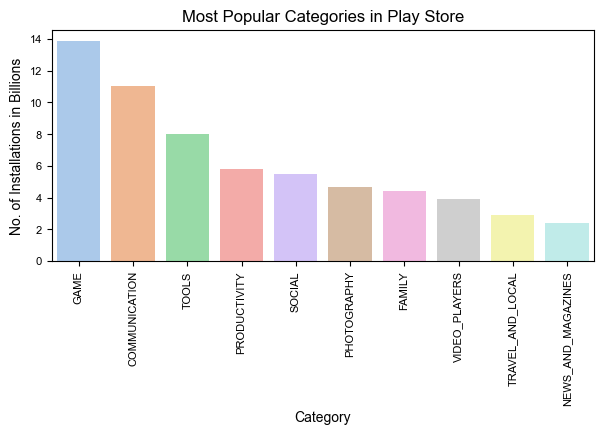

In [49]:
top_installs = google_play_data.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
top_installs.Installs = top_installs.Installs/1000000000# converting into billions
top_installs_10 = top_installs.head(10)
plt.figure(figsize = (7,3))
sns.despine()
ax = sns.barplot(x = 'Category' , y = 'Installs' , data = top_installs_10,palette='pastel' )
ax.set_xlabel('Category',fontsize=10)
ax.set_ylabel('No. of Installations in Billions',fontsize=10)
plt.xticks(fontsize=8,rotation=90)
plt.yticks(fontsize=8)
ax.set_title("Most Popular Categories in Play Store", size = 12)
sns.set_style("white")

In [50]:
google_play_data.groupby(['Category'])['Installs'].sum()[:15].sort_values(ascending=False)

Category
GAME                   13878924410
COMMUNICATION          11038276250
FAMILY                  4427881395
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665968575
BUSINESS                 697164860
FINANCE                  455348730
EDUCATION                352952000
FOOD_AND_DRINK           211798750
DATING                   140926105
ART_AND_DESIGN           114333100
AUTO_AND_VEHICLES         53130210
COMICS                    44981150
BEAUTY                    27197050
EVENTS                    15973160
Name: Installs, dtype: int64

### Insights
#### * The top three categories by number of downloads appear to be GAME, COMMUNICATION, and FAMILY,these categories are the most popular on the google play store platform.
#### * There might be a correlation between the popularity or profitability of a category and the target audience for that category. For example, FAMILY might appeal to a broader audience than BEAUTY, which might be more niche.

### Correlation heatmap

C:\Users\adeeb\AppData\Local\Temp\ipykernel_27156\2262489800.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(google_play_data.corr(),annot=True,annot_kws={'fontsize':10}, cmap='Pastel1')


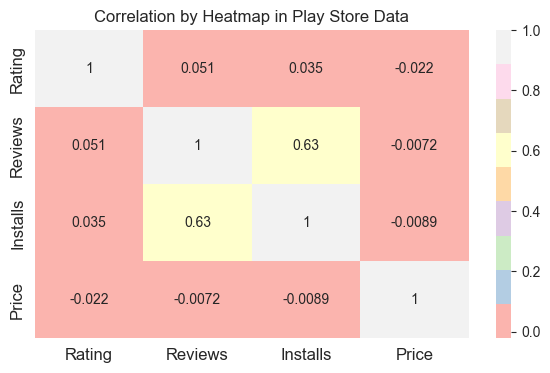

In [51]:
#plot a heatmap to see the correlaton between the columns
plt.figure(figsize=(7,4))
ax=sns.heatmap(google_play_data.corr(),annot=True,annot_kws={'fontsize':10}, cmap='Pastel1')
plt.title("Correlation by Heatmap in Play Store Data",fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

### Insights
#### * The heatmap allows us to see which pairs of columns have a high positive correlation (i.e., both columns tend to increase or decrease together) and which pairs have a high negative correlation (i.e., as one column increases, the other tends to decrease).

#### * The darker the shade of blue, the stronger the positive correlation between the two columns. The darker the shade of red, the stronger the negative correlation between the two columns.

#### * The heatmap suggests that there is a strong positive correlation between the "Reviews" and "Installs" columns, which makes sense because apps with more reviews are likely to have more installs as well.

#### * There is also a moderate positive correlation between the "Size" and "Installs" columns, which suggests that users may be more likely to install larger apps.

#### * On the other hand, there is a weak negative correlation between the "Price" and "Rating" columns, which could suggest that users are less likely to rate apps highly if they have to pay for them.

### Category wise Pricing

In [52]:
grp = google_play_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)

C:\Users\adeeb\AppData\Local\Temp\ipykernel_27156\4287641957.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y,'r-', color='g')


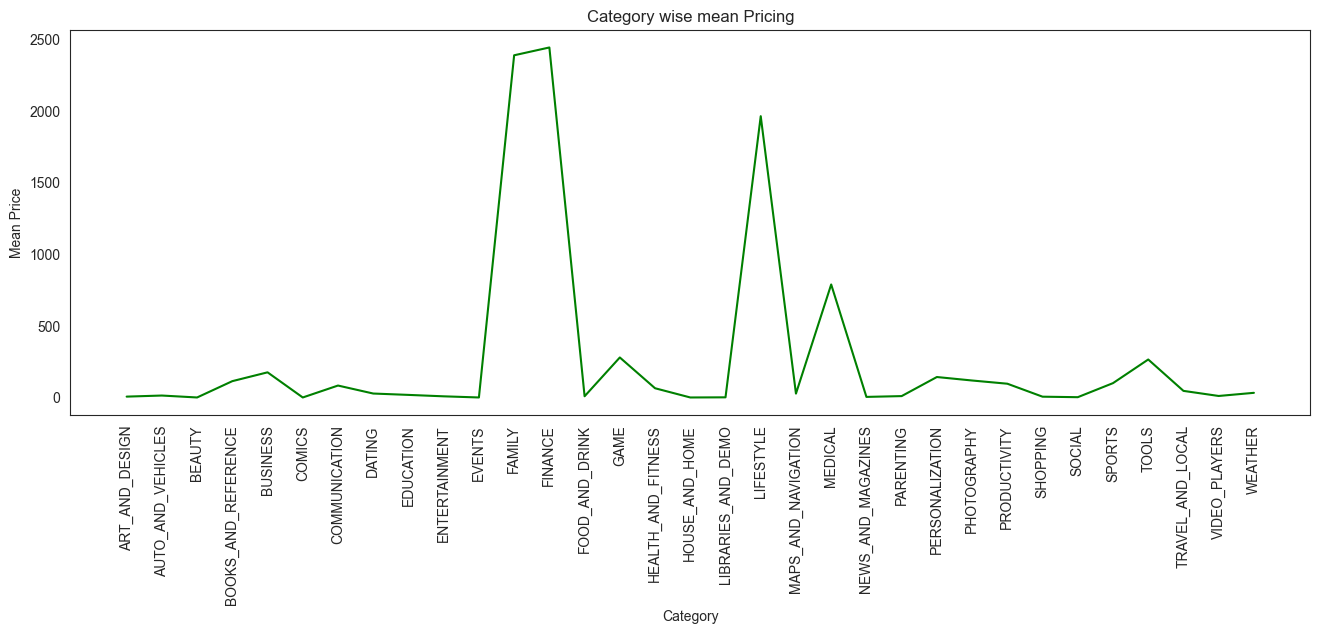

In [53]:
plt.figure(figsize=(16,5))
plt.plot(y,'r-', color='g')
plt.xticks(rotation=90)
plt.title('Category wise mean Pricing')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.show()

### Insights
#### * There appears to be a wide range of mean prices across different app categories. Some categories, such as "Finance" and "Medical", have a higher mean price than others, such as "Entertainment" and "Education".

#### * The plot suggests that categories with a higher mean price may have fewer apps available than categories with lower mean prices. This is particularly noticeable in categories such as "Medical" and "Books and Reference", which have a relatively high mean price but a relatively low number of apps.

#### * The plot also suggests that there may be some outliers in the data, particularly in the "Family" category where the mean price is much higher than in other categories.

#### * It is important to note that this plot only shows the mean price for each category, so it may not be representative of the full distribution of prices within each category.

### Mean Rating for each category

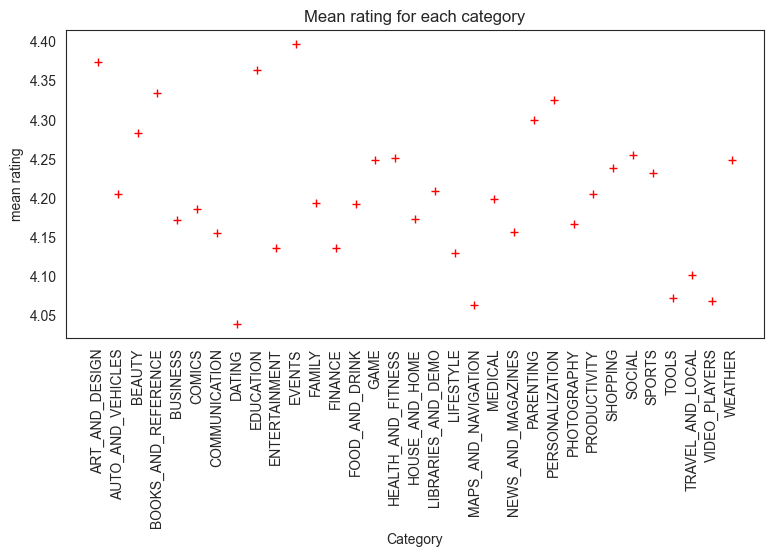

In [54]:
plt.figure(figsize=(9,4))
plt.plot(x, 'r+')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('mean rating')
plt.title('Mean rating for each category')
plt.show()

#### Insights
#### * The mean rating for different app categories appears to be relatively consistent, with most categories falling within the range of 3.5 to 4.5.

#### * The "Events" and "Education" categories have the highest mean ratings, while the "Dating" category has the lowest mean rating.

#### * There are some categories with a relatively low number of apps, such as "Comics" and "Beauty", which may make their mean rating less representative of the full range of ratings within the category.

### Distribution of App Ratings

Text(0.5, 1.0, 'Distribution of App Ratings')

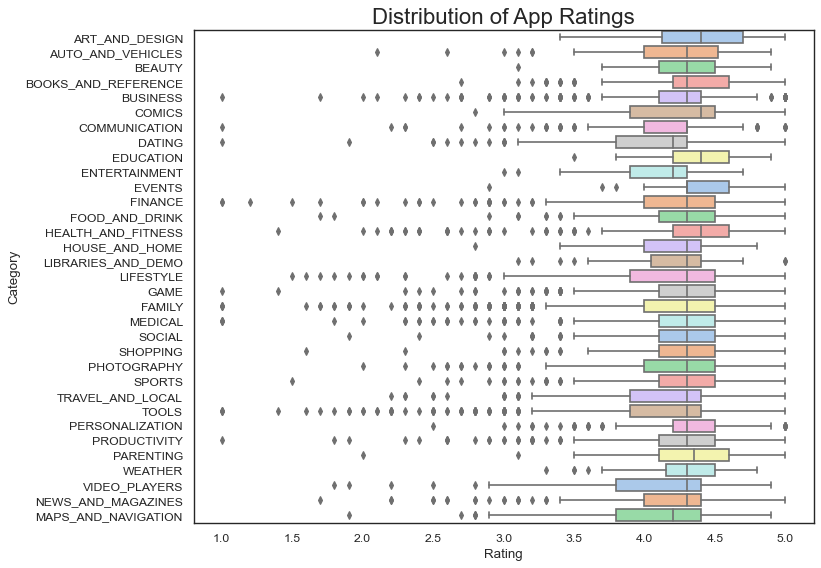

In [55]:
plt.figure(figsize=(10,8), dpi=80)
_ = sns.set_context("notebook")
ax = sns.boxplot(x='Rating', y='Category', data=google_play_data, notch=False, palette=sns.color_palette('pastel'))

ax.set_title('Distribution of App Ratings', size=20)


### Insights
#### * There are also many outliers in this dataset, particularly in the "Finance" and "Lifestyle" categories. These outliers may represent apps that have a significantly higher or lower rating than the majority of apps in that category. It is important to investigate these outliers further to understand why they have such extreme ratings and whether they are indicative of any underlying issues with the data or the apps themselves.